<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/Regresion_Logistica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# Regresion Logistica

- Es una tecnica de clasificacion
- Es uo de los algoritmos de clasificacion mas usados.
- Principalmente implementado para la clasificacion binaria (2 clases) aunque tambien se puede para multiclase
- es un caso especial de la regresion lineal.

## Funcion / Hipotesis

Para evaluar un modelo de Regresion Logistica asumimos
- El valor 1 de la variable dependiente es el valor deseado de clasificacion (binaria)
- Se incluyen las variables independientes representativas.
- Las variables independientes deben ser independientes entre ellas, es decir poca o ninguna multicolinealidad.
- 

\begin{align}
h_ϴ(xi) = \theta_0 + \theta_1*x_1 + ... + \theta_n*x_n
\end{align}

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-y}}  $$ 

Al combinar la regresion lineal aplicando una funcion sigmoide nos da la hipotesis de nuestro modelo.

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(\theta_0 + \theta_1*x_1 + ... + \theta_n*x_n)}}  $$ 

Nuestra funcion Sigmoide nos va a entregar un valor de 0 a 1, aca es donde nosotros definimos un limite con el fin de mapear los valores a una de nuestras categorias.

p ≥ 0.5 => clase = 1

p < 0.5 => clase = 0 

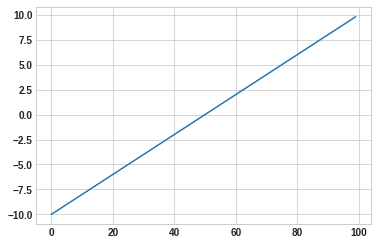

In [ ]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)

plt.plot(x)
plt.show()

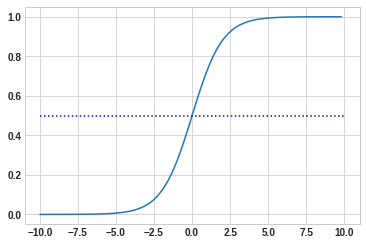

In [ ]:
lines = np.linspace(-10, 10, 10)
plt.plot(x,sigmoid(x))
plt.plot(lines, np.zeros(10) + 0.5, ':b')
plt.show()

## Funcion de Perdida

En el caso de la regresion logistica usamos la funcion de Log-loss para calcular nuestras perdidas

$$\mathbf{ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}(y_i * \log(p(y_i))) + ((1 - y_i) * \log(1 - p(y_i))}$$

Que nos dice la funcion arriba:
- cuando $y$ es 0, si mi prediccion es cercana a mi $y(0)$ entonces el log es 0
- cuando $y$ es 1, si mi prediccion se acerca a mi $y(1)$ entonces el log es 1 si no es un numero opuesto lejano

como lo que queremos es el mas optimo buscamos el logloss menor

In [ ]:
import math
# caso 0 - predice 1
print((1-0) * math.log(1 - 0.9999))
# caso 2
print(1 * math.log(0.999))

-9.210340371976294
-0.0010005003335835344


## Algoritmo de Optimizacion

- Gradiente descendente   

Con el fin de lograr encontrar el set de parametros optimos (pendiente y constante) usamos un algoritmo de optimizacion.

Vamos a implementar en clase el algoritmo mas famoso de Machine learning el cual es el de Gradiente descendente, este calcula de manera iterativa la funcion de perdida con respecto a nuestros parametros hasta que alcanzamos el minimo local.

Lo que buscamos aca es encontrar un minimo ya sea global o local que me entregue un modelo lo suficientemente util para lo que necesitamos.

El algoritmo es igual al de la regresion lineal excepto el $h(x)$ el cual seria nuestra hipotesis de la regresion.


\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

## Programemos


Vamos a realizar un ejemplo de un modelo de Regresion Logistica.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/weatherAUS.csv')

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
sns.distplot(x=df['Rainfall'])

In [ ]:
sns.distplot(x=df['Temp3pm'])

In [ ]:
#Revisamos que nulos tenemos
df.isnull().sum()

In [ ]:
#Se debe hacer una limpieza de los datos
df['Date']

In [ ]:
df['Date'].dtypes

In [ ]:
#Castiamos la columna de fecha para cambiar el tipo de objeto, es decir, cambiamos el formato inicial que trae la columnna por un formato de fecha de python
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Si verificamos nuevamente el tipo de datos, se ha modificado
df['Date'].dtypes

In [ ]:
#Ahora podemos usar los métodos de formato de fecha
df['Date'].dt.year

In [ ]:
#Creamos nuevas columnas con el año, mes y día unicamente
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df['Month']

In [ ]:
df.info()

NameError: ignored

In [ ]:
##Eliminamos la variable fecha ya que creamos nuevas columnas de fecha
##Dataset para entrenar
df = df.drop(['Date'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

NameError: ignored

In [ ]:
##Obtenemos las variables categoricas de X y las almacenamos en una lista
categoricas = [col for col in X if X[col].dtypes=='object']
categoricas

In [ ]:
##Obtenemos las variables numericas de X y las almacenamos en una lista
numericas = [col for col in X if X[col].dtypes !='object']
numericas

In [ ]:
for col in numericas:
  if X[col].isnull().mean() > 0:
    print(col, round(X[col].isnull().mean(), 4))

In [ ]:
##Porcentaje de datos nulos en cada columna según la muestra total, 
for col in numericas:
  if X[col].isnull().mean() > 0:
    print(col, round(100*X[col].isnull().sum()/X.shape[0], 4))

In [ ]:
##Los datos faltantes o nulos los vamos a llenar con la media de los datos
for col in numericas:
  col_median = X[col].mean()
  X[col].fillna(col_median, inplace=True)

In [ ]:
#Verificamos cuantos nulos quedaron
X[numericas].isnull().sum()

In [ ]:
##Verificamos cuantas variables categoricas hay en la variables categoricas
X[categoricas].isnull().sum()

In [ ]:
for col in categoricas:
  col_mode = X[col].mode()[0]
  X[col].fillna(col_mode, inplace=True)

In [ ]:
##Función para quitar los outliers
def valor_maximo(datos,variable,top):
  return np.where(datos[variable]>top, top, datos[variable])

In [ ]:
X.isnull().sum()

In [ ]:
##Este grafico nos muestra que hay mucha cantidad de outliers en la columna evaporación
sns.boxplot(x="Rainfall", data=X)

In [ ]:
##Función para quitar los outliers
def valor_maximo(datos,variable,top):
  return np.where(datos[variable]>top, top, df[variable])

In [ ]:
df['Rainfall'] = valor_maximo (X,'Rainfall', 10)

NameError: ignored

In [ ]:
X['Rainfall'].describe()

In [ ]:
##La idea es reemplazar los outliers con el percentil 75
for col in ('Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm'):
  X[col] = valor_maximo(X, col, X[col].describe()['75%'])

In [ ]:
X.dtypes

In [ ]:
data_dummy = pd.get_dummies(data=X, columns=categoricas, drop_first=True, dtype="int8")

In [ ]:
y_dummy =  pd.get_dummies(data=y, drop_first=True, dtype="int8")

In [ ]:
data_dummy.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y_dummy, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

regresor_log = LogisticRegression(solver='liblinear', random_state=2)

regresor_log.fit(X_train, y_train)

In [ ]:
y_pred = regresor_log.predict(X_test)
y_pred

In [ ]:
for i in range(len(y_pred)):
  print(y_pred[i] == y_test[i])

In [ ]:
from sklearn.metrics import confusion_matrix

y = confusion_matrix(y_test, y_pred)

In [ ]:
(y[0][0] + y[1][0])/(y[0][0] + y[0][1] + y[1][0]+y[1][1])